In [3]:
#I will be predicting Tesla's stock price from the past 30 days stock price. 

In [4]:
import math
import pandas_datareader as web
import numpy as np
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense, LSTM
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

Using TensorFlow backend.


In [5]:
df = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-10-01') #creating data set
df


,High,Low,Open,Close,Volume,Adj Close
Date,,,,,,
2012-01-03,5.900000,5.530000,5.788000,5.616000,4640500.0,5.616000
2012-01-04,5.734000,5.500000,5.642000,5.542000,3150500.0,5.542000
2012-01-05,5.586000,5.370000,5.552000,5.424000,5027500.0,5.424000
2012-01-06,5.558000,5.282000,5.440000,5.382000,4931500.0,5.382000
2012-01-09,5.498000,5.224000,5.400000,5.450000,4485000.0,5.450000
...,...,...,...,...,...,...
2020-09-25,408.730011,391.299988,393.470001,407.339996,67208500.0,407.339996
2020-09-28,428.079987,415.549988,424.619995,421.200012,49719600.0,421.200012
2020-09-29,428.500000,411.600006,416.000000,419.070007,50219300.0,419.070007


In [6]:
df.shape #getting the number of rows and columns in the data set

(2202, 6)

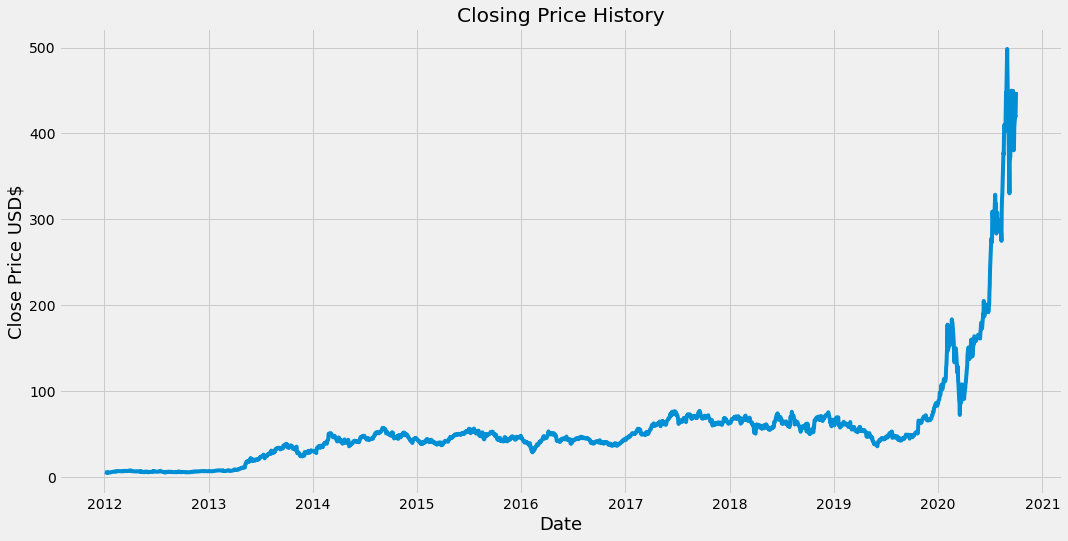

In [7]:
#visualize closing stock price history
plt.figure(figsize=(16, 8))
plt.title('Closing Price History')
plt.plot(df['Close'])
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD$', fontsize=18)
plt.show()

In [8]:
#Creating a Dataframe
data = df.filter(['Close'])
dataset = data.values #Creating the dataset
training_data_len = math.ceil( len(dataset) * .8 ) #getting the number of rows to train the model on
training_data_len

1762

In [9]:
#Scaling data 
scaler = MinMaxScaler(feature_range=(0,1))
scaled_data = scaler.fit_transform(dataset)

scaled_data

array([[0.00214273],
       [0.00199286],
       [0.00175388],
       ...,
       [0.83949757],
       [0.85962874],
       [0.89841259]])

In [10]:
train_data = scaled_data[0:training_data_len, :]
#splitting the data sets into 2, x, and y train
x_train = []
y_train= []

for i in range(30, len(train_data)):
    x_train.append(train_data[i-30:i, 0])
    y_train.append(train_data[i, 0])
    if i <= 30:
        print(x_train)
        print(y_train)
        print()

[array([0.00214273, 0.00199286, 0.00175388, 0.00166882, 0.00180654,
       0.00195641, 0.00220349, 0.00221159, 0.        , 0.00154325,
       0.00162831, 0.00160806, 0.00154325, 0.00161211, 0.0018754 ,
       0.00209818, 0.00249108, 0.00264905, 0.00274626, 0.00254374,
       0.00275031, 0.0030217 , 0.00338625, 0.00364953, 0.00356852,
       0.00370219, 0.00396547, 0.00336599, 0.00352396, 0.00420445])]
[0.004378627093149661]



In [11]:
x_train, y_train = np.array(x_train), np.array(y_train)

In [12]:
x_train = np.reshape(x_train, (x_train.shape[0], x_train.shape[1], 1))
x_train.shape

(1732, 30, 1)

In [13]:
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(30, 1)))
model.add(LSTM(50, return_sequences=False))
model.add(Dense(25))
model.add(Dense(1))

In [14]:
#compiling the model
model.compile(optimizer='adam', loss='mean_squared_error')


In [15]:
model.fit(x_train, y_train, batch_size=1, epochs=1) #training the model

Epoch 1/1
1732/1732 [==============================] - 27s 16ms/step - loss: 9.5530e-05


In [16]:
#creating testing ds
test_data = scaled_data[training_data_len - 30: , :]
x_test = []
y_test = dataset[training_data_len: , :]
for i in range(30, len(test_data)):
    x_test.append(test_data[i-30: i,0])


In [17]:
x_test = np.array(x_test)

In [18]:
x_test = np.reshape(x_test, (x_test.shape[0], x_test.shape[1], 1))

In [19]:
predictions = model.predict(x_test)
predictions = scaler.inverse_transform(predictions)
predictions

array([[ 61.435303],
       [ 61.14827 ],
       [ 61.40086 ],
       [ 61.91409 ],
       [ 62.572197],
       [ 63.36426 ],
       [ 64.18175 ],
       [ 64.630516],
       [ 65.05142 ],
       [ 65.438324],
       [ 65.78623 ],
       [ 65.08434 ],
       [ 63.8431  ],
       [ 62.217503],
       [ 60.667255],
       [ 59.461433],
       [ 58.56583 ],
       [ 57.96362 ],
       [ 57.83858 ],
       [ 57.943386],
       [ 58.27201 ],
       [ 58.694504],
       [ 59.30339 ],
       [ 59.844692],
       [ 60.07537 ],
       [ 60.071667],
       [ 60.100746],
       [ 60.115788],
       [ 60.04136 ],
       [ 59.833233],
       [ 59.667988],
       [ 59.492054],
       [ 59.26273 ],
       [ 58.785183],
       [ 58.31006 ],
       [ 57.98071 ],
       [ 57.74722 ],
       [ 57.96373 ],
       [ 58.5014  ],
       [ 58.59479 ],
       [ 58.238205],
       [ 57.49918 ],
       [ 56.637005],
       [ 55.8202  ],
       [ 55.287746],
       [ 55.115864],
       [ 54.9887  ],
       [ 55.0

In [20]:
#get the root mean squared error 
rmse = np.sqrt(np.mean(predictions - y_test)**2)
rmse

15.878133340315385

C:\Users\athre\anaconda3\envs\python\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  This is separate from the ipykernel package so we can avoid doing imports until


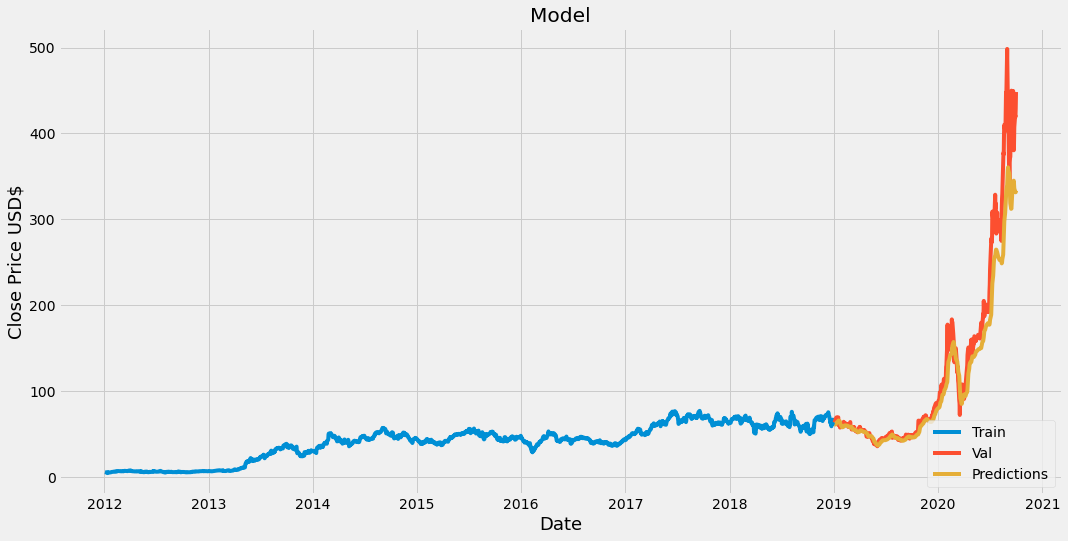

In [21]:
train = data[:training_data_len]
valid = data[training_data_len:]
valid['Predictions'] = predictions
#visualize data
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date', fontsize=18)
plt.ylabel('Close Price USD$', fontsize=18)
plt.plot(train['Close'])
plt.plot(valid[['Close', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

In [22]:
valid

,Close,Predictions
Date,,
2019-01-04,63.537998,61.435303
2019-01-07,66.991997,61.148270
2019-01-08,67.070000,61.400860
2019-01-09,67.706001,61.914089
2019-01-10,68.994003,62.572197
...,...,...
2020-09-25,407.339996,335.857178
2020-09-28,421.200012,332.334564
2020-09-29,419.070007,331.416016


In [23]:
tesla_quote = web.DataReader('TSLA', data_source='yahoo', start='2012-01-01', end='2020-10-20')
new_df = tesla_quote.filter(['Close'])
last_30_days = new_df[-30:].values
last_30_days_scaled = scaler.transform(last_30_days)
X_test = []
X_test.append(last_30_days_scaled)
X_test = np.array(X_test)
X_test = np.reshape(X_test, (X_test.shape[0], X_test.shape[1], 1))
pred_price = model.predict(X_test)
pred_price = scaler.inverse_transform(pred_price)
print(pred_price)

[[349.39822]]
